# TAREA FINAL: Datos de vivienda
### Carlos Serrano Valera
### 01/02/21


<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Inicializar y cargar el contexto spark

In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #d
!pip install -q findspark 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #funciones dels sistema de python para cambiar variables de entorno y que funcione
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark #tenemos que generar un contexto spark para trabajar
findspark.init()
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() #generamos una sesi


In [59]:
# Importamos las sesiones
from pyspark.sql.functions import col, avg, desc, sum

A continuación ,cargamos los datos. Estos vienen separados por ";", por lo que he especificado ese parámetro en la función de lectura.
Se muestran las 10 primeras entradas

In [5]:
# Cargamos los datos
raw_viviendas = spark.read.format("csv") \
    .option("sep", ";") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("BDpracticafinalCSV.csv")

# Vemos las primeras 10 filas
raw_viviendas.show(10)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|    1|      

Hacemos un count para comprobar las observaciones que hay

In [12]:
raw_viviendas.count()

2936

A continuación, voy a renombrar los nombres de las columnas, eliminando los espacios entre las palabras. Para ello he utilizado el paquete quinn, con la función `with_columns_renamed` 

In [7]:
!pip install quinn

     |████████████████████████████████| 204.2MB 73kB/s 
     |████████████████████████████████| 204kB 7.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=c1478d2408e42078bbb9b01e45e81d65460aa8cb5b0f07a56187d1b20ed93b7f
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [8]:

import quinn
def spaces_to_underscores(s):
    return s.replace(" ", "_")
raw_viviendas = quinn.with_columns_renamed(spaces_to_underscores)(raw_viviendas)
raw_viviendas.show()

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|Order|MS_Zoning|Lot_Frontage|Lot_Area|Land_Contour|Land_Slope|Overall_Qual|Year_Built|Year_Remod/Add|Mas_Vnr_Type|Exter_Qual|Bsmt_Cond|Total_Bsmt_SF|Heating_QC|Central_Air|Full_Bath|Half_Bath|Bedroom_AbvGr|Kitchen_AbvGr|Kitchen_Qual|TotRms_AbvGrd|Garage_Cars|Garage_Area|Garage_Cond|Pool_Area|Pool_QC|Mo_Sold|Yr_Sold|SalePrice|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|    1|      

Con la función `printSchema()` observamos la estructura de los datos, donde se observa el tipo que contiene cada variable

In [9]:
# Observamos los datos con printSchema()
raw_viviendas.printSchema()

root
 |-- Order: integer (nullable = true)
 |-- MS_Zoning: string (nullable = true)
 |-- Lot_Frontage: integer (nullable = true)
 |-- Lot_Area: integer (nullable = true)
 |-- Land_Contour: string (nullable = true)
 |-- Land_Slope: string (nullable = true)
 |-- Overall_Qual: integer (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Year_Remod/Add: integer (nullable = true)
 |-- Mas_Vnr_Type: string (nullable = true)
 |-- Exter_Qual: string (nullable = true)
 |-- Bsmt_Cond: string (nullable = true)
 |-- Total_Bsmt_SF: integer (nullable = true)
 |-- Heating_QC: string (nullable = true)
 |-- Central_Air: string (nullable = true)
 |-- Full_Bath: integer (nullable = true)
 |-- Half_Bath: integer (nullable = true)
 |-- Bedroom_AbvGr: integer (nullable = true)
 |-- Kitchen_AbvGr: integer (nullable = true)
 |-- Kitchen_Qual: string (nullable = true)
 |-- TotRms_AbvGrd: integer (nullable = true)
 |-- Garage_Cars: integer (nullable = true)
 |-- Garage_Area: integer (nullable = tru

Lo siguiente sería filtrar la base de datos por las zonas residenciales, como viene especificado en el enunciado. No he logrado filtrarlas y he dejado los distintos problemas con los que me he encontrado al intentarlo.
He intentado de dos maneras, con la opción de filter sobre la variable en cuestión y también con código sql. Ninguna ha sido fructuosa.

Los dejo en el documento a modo de prueba de que no he pasado por alto este detalle. Sin embargo, tendré que trabajar de aquí en adelante con todo el grupo de datos

In [50]:
# Filtro varias veces en MS_Zoning...
raw_viviendas.filter(raw_viviendas('MS_Zoning') == 'RL' | raw_viviendas('MS_Zoning') == 'RM' | raw_viviendas('MS_Zoning') == 'RH').collect()

TypeError: ignored

In [33]:
# Segundo intento, para poder trabajar con sql dentro de spark, pasamos a formato tabla el df de raw_viviendas
raw_viviendas.registerTempTable("viviendas")

In [51]:
# Creamos un objeto con la entrada de sql
residencias = spark.sql("""
    SELECT * 
    FROM viviendas 
    WHERE MS_Zoning == 'RL' or MS_Zoning == 'RM' or MS_Zoning == 'RH'
""").show()

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|Order|MS_Zoning|Lot_Frontage|Lot_Area|Land_Contour|Land_Slope|Overall_Qual|Year_Built|Year_Remod/Add|Mas_Vnr_Type|Exter_Qual|Bsmt_Cond|Total_Bsmt_SF|Heating_QC|Central_Air|Full_Bath|Half_Bath|Bedroom_AbvGr|Kitchen_AbvGr|Kitchen_Qual|TotRms_AbvGrd|Garage_Cars|Garage_Area|Garage_Cond|Pool_Area|Pool_QC|Mo_Sold|Yr_Sold|SalePrice|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|    1|      

In [113]:
# Compruebo el objeto creado. El tipo del objeto es 'NoneType'
residencias.show()

AttributeError: ignored

In [114]:
# Trato de pasar el objeto a dataframe para poder trabajar con ello, pero este tipo de objeto
# no permite iteraciones...
spark.createDataFrame(residencias)



TypeError: ignored

## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Para conocer el número de viviendas distintas que hay en el dataset, utilizamos la función distinct sobre la columna de Order. Aquí vemos que hay 2930 entradas únicas de `Order`. En el count() realizado anteriormente, se obtenían 2936, por lo que habría 6 viviendas que estarían repetidas. La duplicidad se podría deber a que hay registros que pertenecen al mismo bloque de viviendas, y tiene el mismo identificador, pero corresponda a casas distintas, es por ello que he decidido dejar los duplicados en este caso

In [57]:
raw_viviendas.select("Order").distinct().count()

2930

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Como no he podido filtrar, obtengo el precio medio de todas las zonas, agrupando por la variable `MS_Zoning`, y calculando la media de `SalePrice`

In [115]:
# groupby() sobre la zona y luego calculo la media del precio con avg
raw_viviendas.groupBy("MS_Zoning")\
    .agg(avg("SalePrice"))\
    .show()

+---------+------------------+
|MS_Zoning|    avg(SalePrice)|
+---------+------------------+
|       RH|136419.77777777778|
|       FV|218986.94964028776|
|        C|          79795.04|
|        A|           47300.0|
|       Rl|254833.33333333334|
|       RL|191131.80581241744|
|       rL|          320000.0|
|        I|           80312.5|
|       RM|126781.39393939394|
+---------+------------------+



## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

En esta ocasión, no he podido encontrar la manera de calcular las décadas a partir de Year Built. Sin embargo, he obtenido la media de superficie del sotano para cada año, de nuevo utilizando groupby() y avg().
Se puede intuir que en la segunda década contemplada, la superficie del sótano en las nuevas construcciones, subió, en general.

In [109]:
raw_viviendas.select("Year_Built", "Total_Bsmt_SF")\
  .groupby("Year_Built")\
  .agg(avg("Total_Bsmt_SF")) \
  .sort(desc("Year_Built")) \ # ordenamos de mayor a menor por año
  .show()

+----------+------------------+
|Year_Built|avg(Total_Bsmt_SF)|
+----------+------------------+
|      2010|1573.3333333333333|
|      2009|           1305.76|
|      2008|1791.5510204081634|
|      2007| 1436.605504587156|
|      2006|1377.7246376811595|
|      2005|1249.3426573426573|
|      2004|1183.7373737373737|
|      2003|1206.2954545454545|
|      2002|1249.8541666666667|
|      2001|1293.0285714285715|
|      2000|1070.0204081632653|
|      1999|1025.0384615384614|
|      1998| 1139.340425531915|
|      1997|1083.9142857142858|
|      1996|1116.1764705882354|
|      1995|1200.8709677419354|
|      1994| 1172.945945945946|
|      1993|1091.9756097560976|
|      1992| 1145.148148148148|
|      1991|1116.3333333333333|
+----------+------------------+
only showing top 20 rows



## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Para obtener las 10 viviendas más caras en el año 2009, he filtrado por este año, y sencillamente ordeno por orden de mayor a menor en Sale Price. Además, se puede selleccionar la superficie del inmueble, aunque aquí está medido en pies cuadrados. Podemos comprobar que la casa más cara de 2009 no era de las más grandes de entre las 10 más caras.

In [73]:
raw_viviendas.select("Yr_Sold", "SalePrice", "Lot_Area")\
  .filter(raw_viviendas.Yr_Sold == '2009')\  # filtro por 2009
  .sort(desc("SalePrice"))\  # ordenamos de mayor a menor precio de venta
  .show(10) # Mostramos solo los 10 primeros

+-------+---------+--------+
|Yr_Sold|SalePrice|Lot_Area|
+-------+---------+--------+
|   2009|   610000|   13693|
|   2009|   582933|   13891|
|   2009|   555000|   15431|
|   2009|   552000|   14836|
|   2009|   501837|   17423|
|   2009|   485000|   13518|
|   2009|   468000|   11128|
|   2009|   462000|   14257|
|   2009|   451950|   13478|
|   2009|   445000|   15274|
+-------+---------+--------+
only showing top 10 rows



## Media anual por zonas del precio de venta y metros cuadrados.

Aquí he realizado una agrupación por zonas, variable `MS_Zoning`, y se calcula directamente la media del precio de venta y la superficie (calculada en pies cuadrados ya que no he sabido transformar la variable)

In [75]:
raw_viviendas.select("MS_Zoning", "SalePrice", "Lot_Area")\
    .groupby("MS_Zoning")\ # agrupacion por zonas
    .agg(avg("SalePrice"), avg("Lot_Area"))\ # calculos sobre precio de venta y superficie
    .show()

+---------+------------------+------------------+
|MS_Zoning|    avg(SalePrice)|     avg(Lot_Area)|
+---------+------------------+------------------+
|       RH|136419.77777777778| 7362.222222222223|
|       FV|218986.94964028776| 6549.359712230216|
|        C|          79795.04|           8320.72|
|        A|           47300.0|           22917.0|
|       Rl|254833.33333333334|11199.666666666666|
|       RL|191131.80581241744|11141.499779832673|
|       rL|          320000.0|           13618.0|
|        I|           80312.5|           39190.0|
|       RM|126781.39393939394| 6411.497835497836|
+---------+------------------+------------------+



## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

Hay dos tipos de ladrillo. Realizo un distinct para conocer cómo vienen especificados los valores posibles de Mas Vnr Type

In [92]:
raw_viviendas.select("Mas_Vnr_Type").distinct().show()

+------------+
|Mas_Vnr_Type|
+------------+
|        None|
|      BrkCmn|
|        null|
|       Stone|
|     BrkFace|
|      CBlock|
+------------+



Acto seguido, calcula el total de la recaudación de cada tipo de material, sumando los precios de venta. Para ello, filtro tres veces, y calculo el total en cada caso

In [116]:
raw_viviendas.select("Mas_Vnr_Type", "SalePrice")\
    .filter(raw_viviendas.Mas_Vnr_Type == 'BrkCmn')\
    .agg(sum("SalePrice"))\
    .show()

+--------------+
|sum(SalePrice)|
+--------------+
|       3504975|
+--------------+



In [88]:
raw_viviendas.select("Mas_Vnr_Type", "SalePrice")\
    .filter(raw_viviendas.Mas_Vnr_Type == 'BrkFace')\
    .agg(sum("SalePrice"))\
    .show()

+--------------+
|sum(SalePrice)|
+--------------+
|     186003261|
+--------------+



In [89]:
raw_viviendas.select("Mas_Vnr_Type", "SalePrice")\
    .filter(raw_viviendas.Mas_Vnr_Type == 'Stone')\
    .agg(sum("SalePrice"))\
    .show()

+--------------+
|sum(SalePrice)|
+--------------+
|      65196277|
+--------------+



El ladrillo tiene una recaudación bastante más significativa que la piedra, ya que tiene aproximadamente 100 millones más en ganancias

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

Para obtenerlo, he hecho dos filtros, uno por caso, y en cada uno de ellos, he obtenido la media de los precios con avg.
En esta ocasión he empleado código sql ya que me resultaba más sencillo.

In [96]:
spark.sql("""
SELECT avg(SalePrice)
from viviendas
where Garage_Cars >= 2 and Kitchen_AbvGr = 2
""").show()

+-----------------+
|   avg(SalePrice)|
+-----------------+
|144995.2643678161|
+-----------------+



In [97]:
spark.sql("""
SELECT avg(SalePrice)
from viviendas
where Garage_Cars = 1 and Kitchen_AbvGr = 1
""").show()

+------------------+
|    avg(SalePrice)|
+------------------+
|127367.04161248375|
+------------------+



Tenemos que las casas con 2 cocinas y más de 1 garaje son en media más caras que las que únicamente tienen una de cada, lo cual tiene sentido.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Para obtener la relación entre ambas, he decidido primero obtener la media de precio por número de garajes, y representar esta relación con un gráfico de barras. Me he apoyado en este caso de pandas para hacer la representación. De esta manera, se podrá visualizar cómo cambia el precio según lo hace el número de garajes disponible.

Es preciso, sin embargo, obviar la fila de nulls, dado que no nos aporta información. No he podido eliminarla con código

In [102]:
# Obtenemos primero la tabla con las medias para cada garaje
num_garajes = raw_viviendas.select("SalePrice", "Garage_Cars")\ # seleccionamos ambas variables
    .groupBy("Garage_Cars")\
    .agg(avg("SalePrice"))


num_garajes.show()

+-----------+------------------+
|Garage_Cars|    avg(SalePrice)|
+-----------+------------------+
|       null|          150909.0|
|          1|127267.42287917738|
|          3|310011.74801061006|
|          5|          126500.0|
|          4|       228748.6875|
|          2|183606.50747198006|
|          0|104949.25477707006|
+-----------+------------------+



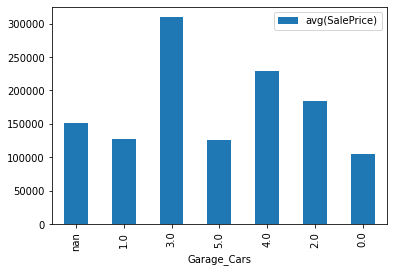

In [104]:
# Pasamos a la representación visual con pandas
# Importamos pandas
import pandas as pd
    
# Formato pandas
pd_num_garajes = num_garajes.toPandas()

# Dibujamos
pd_num_garajes.plot(x="Garage_Cars", y="avg(SalePrice)", kind='bar');

Para valores de 3 y 4 garajas por casa obtenemos los niveles más altos de precios por encima de 1 y 2 garajes. Lo que resulta sorprendente sin embargo, es la bajada en el precio cuando se dan 5 garajes. Parece que aumentar el número de garajes indefinidamente, este factor deja de tener un efecto (positivo) sobre el precio de la vivienda